# [Oscilador Paramétrico](https://en.wikipedia.org/wiki/Parametric_oscillator)

Serie de Taylor
$$f(x)=f(a)+f^{(1)}(a)(x-a)+\frac{f^{(2)}(a)}{2!}(x-a)^2+\cdots +\frac{f^{(n)}(a)}{n!}(x-a)^n+\cdots$$

Tenemos que resolver la ecuación
$$\ddot{x}=\left(\alpha+\beta\cos t\right)\sin x$$

## Solución del péndulo simple

Un péndulo simple tiene por ecuación con $\alpha<0$
$$\ddot{x}=\alpha\sin x$$

Tenemos el siguiente sistema 
$$\begin{array}{l}
\dot{x}=y\\
\dot{y}=\alpha\sin x
\end{array}$$

In [1]:
using PyPlot
include("Taylor.jl")
using ADT
using ODE

In [2]:
"""
 ec1(t, x̄)

Solucion de la ecuación diferencial \$\ddot{x}=\left(\alpha+\beta\cos t\right)\sin x\$.
"""
function ec1(t, x̄)
    
    dx = x̄[2]
    dy = (α + β * cos(t)) * sin(x̄[1])
    
    return [dx; dy]
end

ec1

In [3]:
x̄ = [1.0, 0.0]#vector de condiciones iniciales
t0 = 0.0
tf = 500 * pi

α = -0.001 # α muy pequeña
β = 0.0

t = linspace(t0, tf, 1000)#1000 elementos entre t0 y tf

1000-element LinSpace{Float64}:
 0.0,1.57237,3.14474,4.71711,6.28947,7.86184,…,1566.08,1567.65,1569.22,1570.8

In [4]:
(t1, sol1) = ode45(ec1, x̄, t);

In [5]:
"""
    extraccion(X,coord)

X es un vector de vectores. Esta función crea un vector xpl a partir de extraer la coordenada i de 
cada vector en X.
"""
function extraccion(X,coord)
    xpl = Array{Float64}(length(X))#xpl vector para gráficar
    for i in eachindex(X)
        xpl[i] = X[i][coord]#extraigo la coordenada 1 de cada vector dentro de X
    end
    return xpl
end
x=extraccion(sol1,1)
y=extraccion(sol1,2)
y[1]

0.0

In [6]:
x1 = map(y -> y[1], sol1)
y1 = map(y -> y[2], sol1);

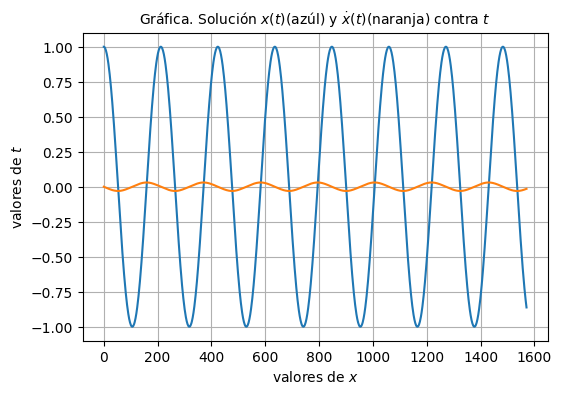

In [7]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t1,x)    # este comando pinta la función f'(x); 
plot(t1,y)
#plot(x,y,",")
title(L"Gráfica. Solución $x(t)$(azúl) y $\dot{x}(t)$(naranja) contra $t$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $t$")
grid() 

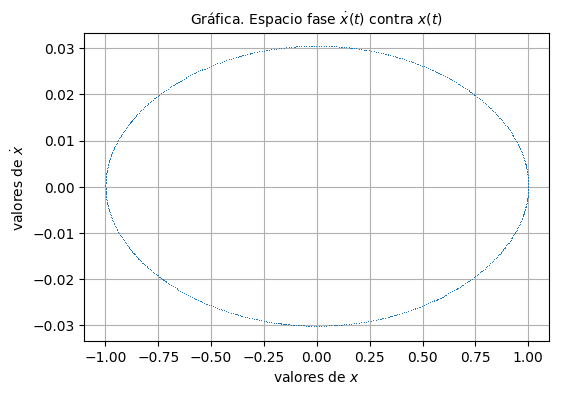

In [8]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(x,y,",")    # este comando pinta la función f'(x); 
title(L"Gráfica. Espacio fase $\dot{x}(t)$ contra $x(t)$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $\dot{x}$")
grid()

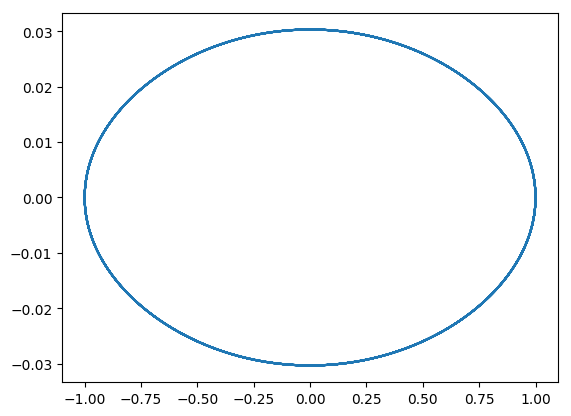

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa128bff950>

In [9]:
plot(x1, y1)

In [10]:
#Función de Ruben
(t2, sol2) = integradorT2(ec1, t0, tf, x̄, 10000, 1e-50);

Integracion terminada
#T = 2737, #X̄ = 2737, n = 2737 / 10000


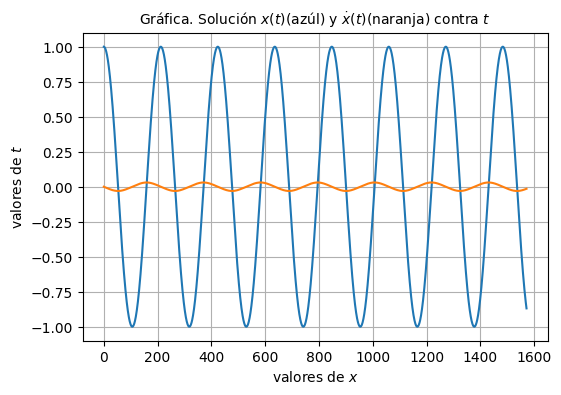

In [11]:
x=extraccion(sol2,1)
y=extraccion(sol2,2)
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t2,x)    # este comando pinta la función f'(x); 
plot(t2,y)
#plot(x,y,",")
title(L"Gráfica. Solución $x(t)$(azúl) y $\dot{x}(t)$(naranja) contra $t$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $t$")
grid() 

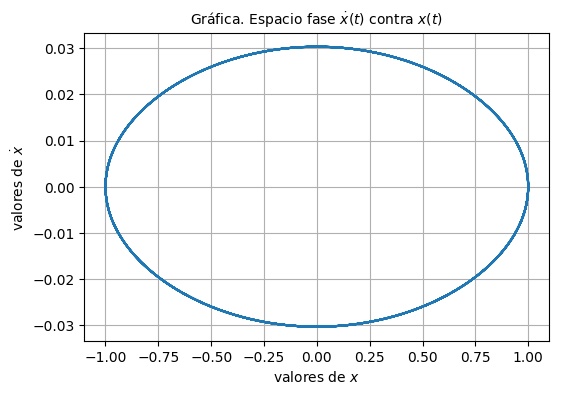

In [12]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(x,y)    # este comando pinta la función f'(x); 
title(L"Gráfica. Espacio fase $\dot{x}(t)$ contra $x(t)$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $\dot{x}$")
grid()

In [13]:
x2 = map(y -> y[1], sol2)
y2 = map(y -> y[2], sol2);

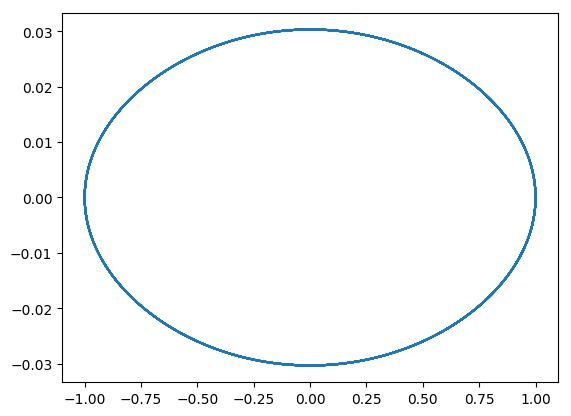

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa12897a3d0>

In [14]:
plot(x2, y2)
# xlim(-0.8, -0.7)
# ylim(-0.25, 0.25)

In [15]:
include("TaylorDiff2.jl")
using AT

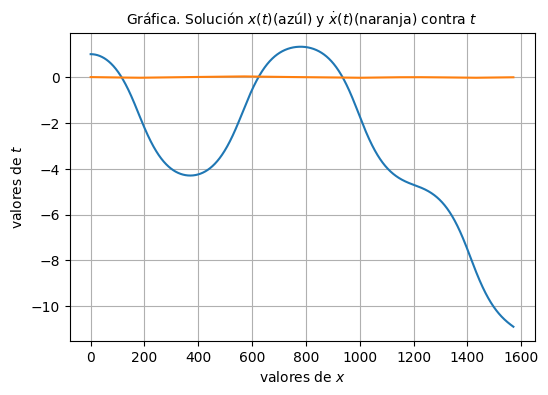

In [16]:
eq1(t,x,y)=y #primera derivada de x
eq2(t,x,y)=(α+β*cos(t))*sin(x) #segunda derivada de x
x0=1.0
y0=0.0
t0 = 0.0
tf = 500 * pi
α = -0.001 # α muy pequeña
β = 0.0
N=30
ϵ=1e-50
t,x,y=integrador(eq1,eq2,x0,y0,t0,tf,ϵ,N)
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,x)    # este comando pinta la función f'(x); 
plot(t,y)
#plot(x,y,",")
title(L"Gráfica. Solución $x(t)$(azúl) y $\dot{x}(t)$(naranja) contra $t$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $t$")
grid() 

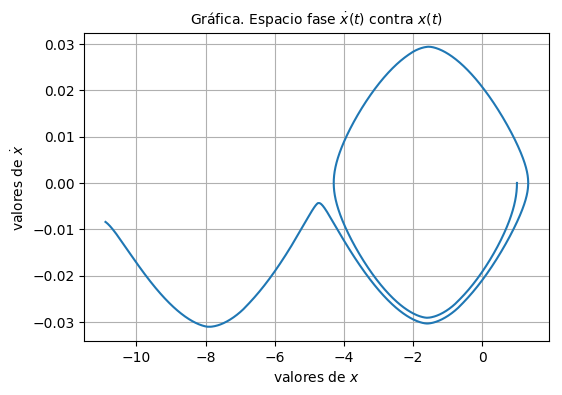

In [17]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(x,y)    # este comando pinta la función f'(x); 
title(L"Gráfica. Espacio fase $\dot{x}(t)$ contra $x(t)$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $\dot{x}$")
grid()

**Para un caso más general**

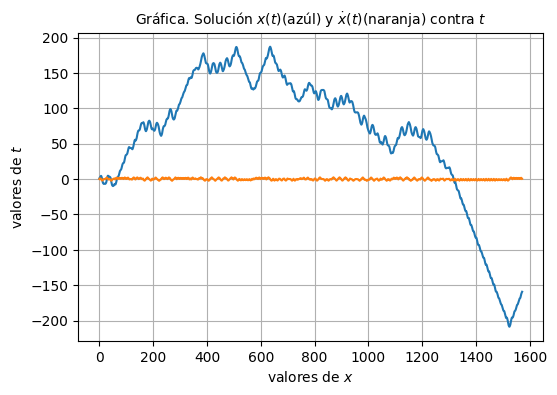

In [18]:
α = 0.01 # α muy pequeña
β = 1.0
(t1, sol1) = ode45(ec1, x̄, t);#ecuación de la libreria ODE
x=extraccion(sol1,1)
y=extraccion(sol1,2)
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t1,x)    # este comando pinta la función f'(x); 
plot(t1,y)
#plot(x,y,",")
title(L"Gráfica. Solución $x(t)$(azúl) y $\dot{x}(t)$(naranja) contra $t$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $t$")
grid() 

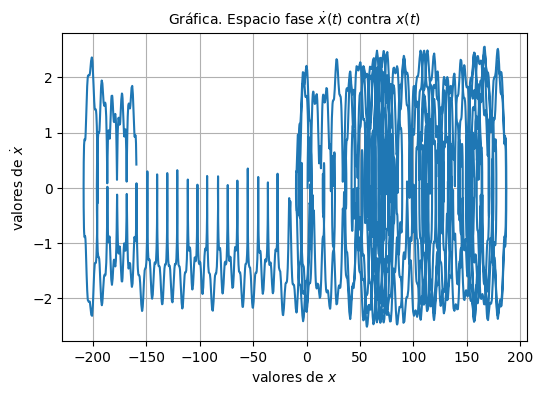

In [20]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(x,y)    # este comando pinta la función f'(x); 
title(L"Gráfica. Espacio fase $\dot{x}(t)$ contra $x(t)$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $\dot{x}$")
grid()

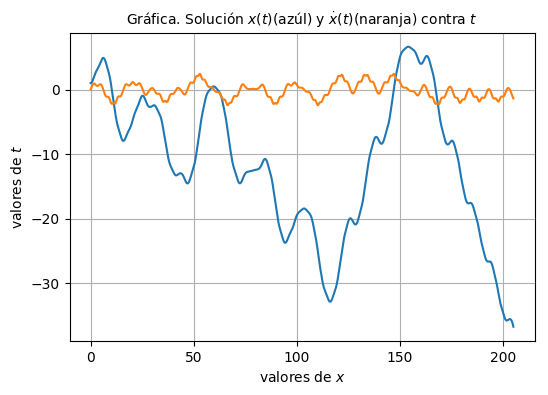

Integracion terminada
#T = 10001, #X̄ = 10001, n = 10001 / 10000


In [21]:
#Función de Ruben
(t2, sol2) = integradorT2(ec1, t0, tf, x̄, 10000, 1e-50);
x=extraccion(sol2,1)
y=extraccion(sol2,2)
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t2,x)    # este comando pinta la función f'(x); 
plot(t2,y)
#plot(x,y,",")
title(L"Gráfica. Solución $x(t)$(azúl) y $\dot{x}(t)$(naranja) contra $t$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $t$")
grid() 

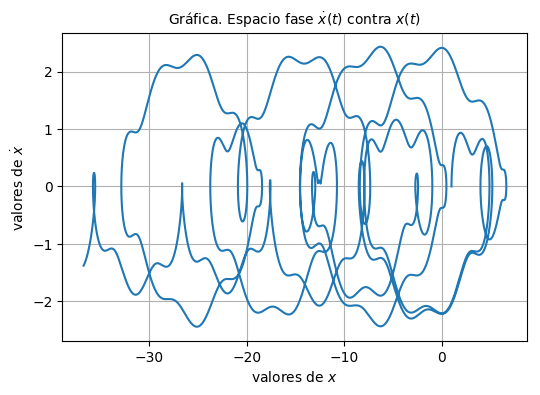

In [22]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(x,y)    # este comando pinta la función f'(x); 
title(L"Gráfica. Espacio fase $\dot{x}(t)$ contra $x(t)$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $\dot{x}$")
grid()

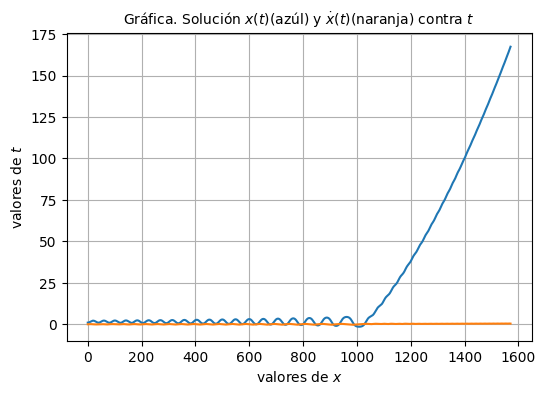

In [23]:
x0=1.0
y0=0.0
t0 = 0.0
tf = 500 * pi
N=30
ϵ=1e-50
t,x,y=integrador(eq1,eq2,x0,y0,t0,tf,ϵ,N)
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,x)    # este comando pinta la función f'(x); 
plot(t,y)
#plot(x,y,",")
title(L"Gráfica. Solución $x(t)$(azúl) y $\dot{x}(t)$(naranja) contra $t$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $t$")
grid() 

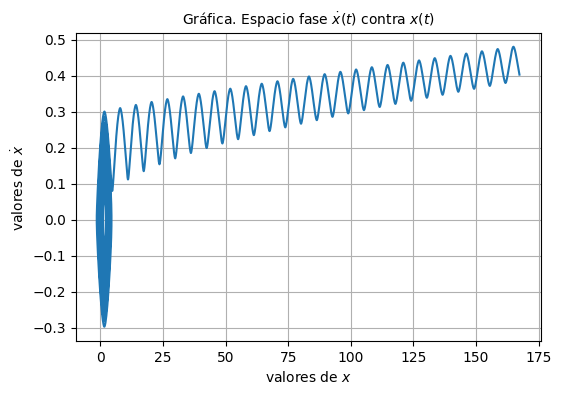

In [24]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(x,y)    # este comando pinta la función f'(x); 
title(L"Gráfica. Espacio fase $\dot{x}(t)$ contra $x(t)$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $\dot{x}$")
grid()